In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize']=10,5

In [2]:
match_df= pd.read_csv('epl.csv')

In [3]:
match_df

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,...,Match Report,NaN,10.0,2.0,14.6,1.0,0.0,0.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,...,Match Report,NaN,19.0,7.0,13.0,0.0,0.0,0.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,...,Match Report,NaN,14.0,6.0,14.8,0.0,0.0,0.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,...,Match Report,NaN,22.0,8.0,15.5,1.0,0.0,0.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,...,Match Report,NaN,22.0,8.0,16.3,1.0,0.0,0.0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,35,2019-04-13,12:30,Premier League,Matchweek 34,Sat,Away,L,0.0,4.0,...,Match Report,NaN,7.0,1.0,18.9,1.0,0.0,0.0,2018,Huddersfield Town
3268,36,2019-04-20,15:00,Premier League,Matchweek 35,Sat,Home,L,1.0,2.0,...,Match Report,NaN,13.0,3.0,18.1,1.0,0.0,0.0,2018,Huddersfield Town
3269,37,2019-04-26,20:00,Premier League,Matchweek 36,Fri,Away,L,0.0,5.0,...,Match Report,NaN,5.0,1.0,21.6,0.0,0.0,0.0,2018,Huddersfield Town
3270,38,2019-05-05,14:00,Premier League,Matchweek 37,Sun,Home,D,1.0,1.0,...,Match Report,NaN,7.0,3.0,19.0,1.0,0.0,0.0,2018,Huddersfield Town


In [4]:
match_df.drop(columns=match_df.columns[0], axis=1, inplace=True)

In [5]:
match_df.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [6]:
match_df["gf"] = match_df["gf"].astype(int)
match_df["ga"] = match_df["ga"].astype(int)

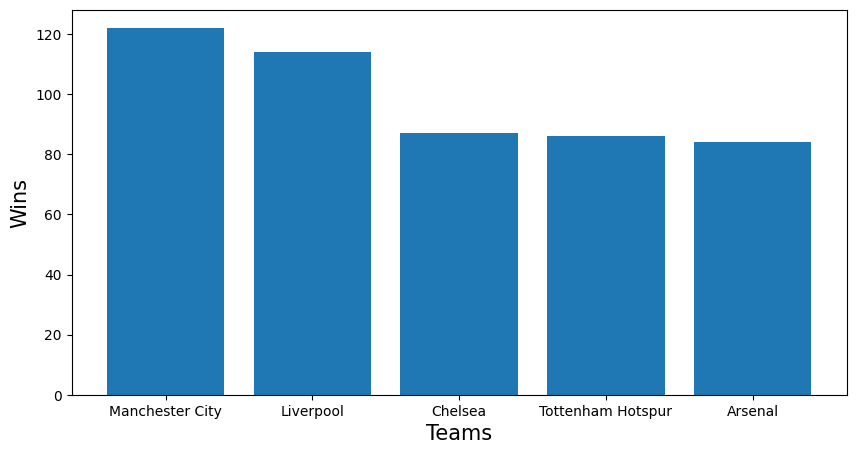

In [7]:
wins_dict = dict()
for currIndx, currRow in match_df.iterrows():
    if currRow["result"] == "W":
        wins_dict[currRow["team"]] = wins_dict.get(currRow["team"],0)+1
wins_list = []
for key,val in wins_dict.items():
    wins_list.append((key,val))
wins_list = sorted(wins_list, key = lambda x: (x[1],x[0]), reverse=True)
teams = [a for (a,b) in wins_list[:5]]
wins = [b for (a,b) in wins_list[:5]]

plt.bar(teams, wins)
#plt.title('Teams with the most wins over the past few seasons')
plt.xlabel('Teams', fontsize=15)
plt.ylabel('Wins', fontsize=15)
plt.show()


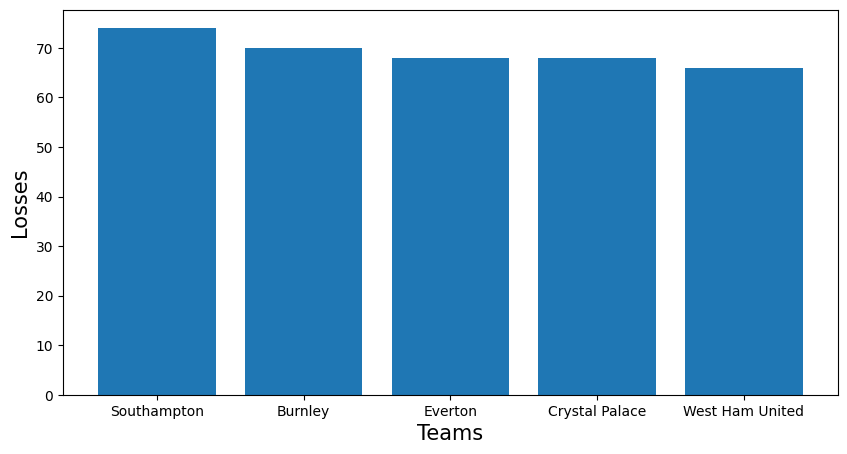

In [8]:
loss_dict = dict()
for currIndx, currRow in match_df.iterrows():
    if currRow["result"] == "L":
        loss_dict[currRow["team"]] = loss_dict.get(currRow["team"],0)+1
loss_list = []
for key,val in loss_dict.items():
    loss_list.append((key,val))
loss_list = sorted(loss_list, key = lambda x: (x[1],x[0]), reverse=True)
loss_teams = [a for (a,b) in loss_list[:5]]
losses  = [b for (a,b) in loss_list[:5]]

plt.bar(loss_teams, losses)
#plt.title('Teams with the most losses over the past few seasons')
plt.xlabel('Teams', fontsize=15)
plt.ylabel('Losses', fontsize=15)
plt.show()

{'Manchester City': {'wins': 67, 'losses': 9}, 'Liverpool': {'wins': 64, 'losses': 6}, 'Chelsea': {'wins': 44, 'losses': 13}, 'Tottenham Hotspur': {'wins': 52, 'losses': 21}, 'Arsenal': {'wins': 50, 'losses': 16}}


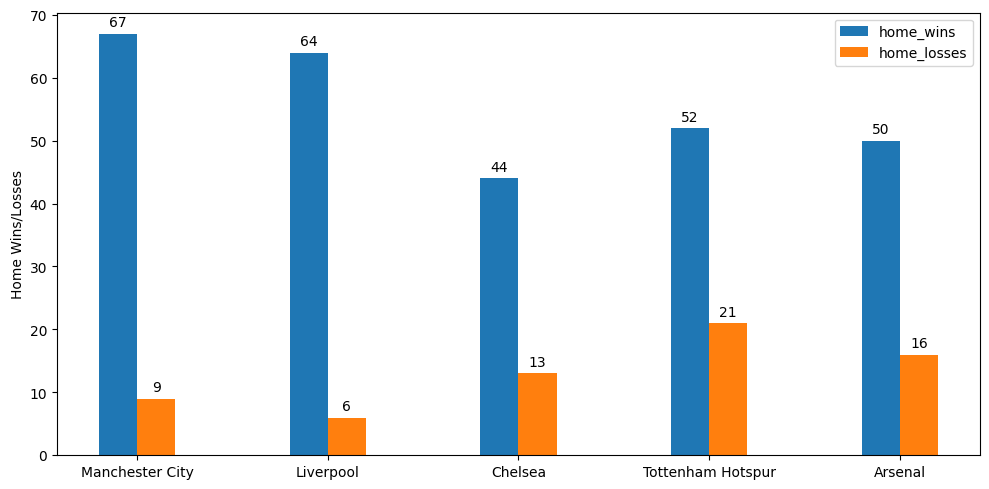

In [9]:
win_loss_dict = dict()
for team in teams:
    temp_df = match_df[match_df.team == team]
    temp_dict = dict()
    for currIndx, currRow in temp_df.iterrows():
        if currRow["result"] == "W" and currRow["venue"] == "Home":
            temp_dict["wins"] = temp_dict.get("wins",0)+1
        elif currRow["result"] == "L" and currRow["venue"] == "Home":
            temp_dict["losses"] = temp_dict.get("losses",0)+1
    win_loss_dict[team] = temp_dict
print(win_loss_dict)
x_labels = teams
home_wins = [v["wins"] for (k,v) in win_loss_dict.items()]
home_losses = [v["losses"] for (k,v) in win_loss_dict.items()]

x = np.arange(len(x_labels))
width = 0.2

figure, ax = plt.subplots()
rects1 = ax.bar(x - width/2, home_wins, width, label='home_wins')
rects2 = ax.bar(x + width/2, home_losses, width, label='home_losses')

ax.set_ylabel('Home Wins/Losses')
#ax.set_title('Home games - Wins vs Losses')
ax.set_xticks(x, x_labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

figure.tight_layout()

plt.show()

{'Manchester City': {'wins': 55, 'losses': 14}, 'Liverpool': {'losses': 12, 'wins': 50}, 'Chelsea': {'wins': 43, 'losses': 24}, 'Tottenham Hotspur': {'wins': 34, 'losses': 29}, 'Arsenal': {'wins': 34, 'losses': 31}}


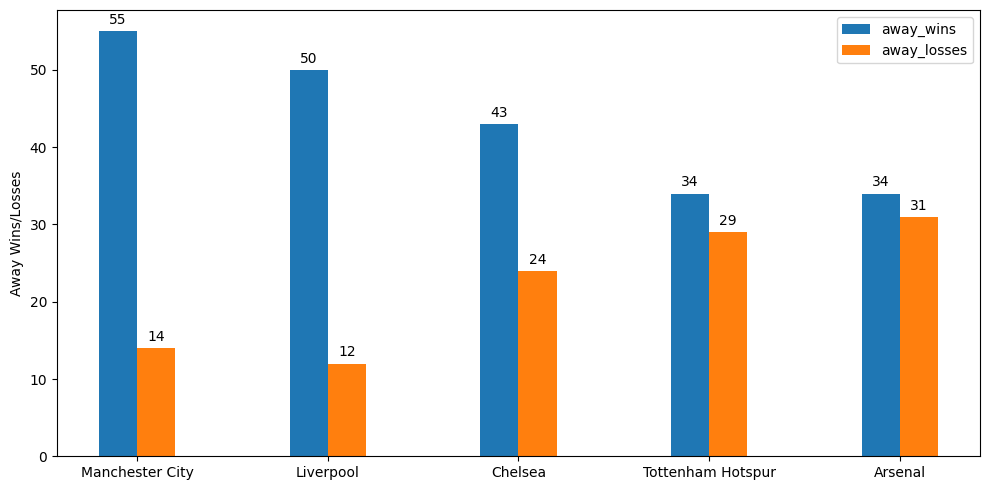

In [10]:
win_loss_dict = dict()
for team in teams:
    temp_df = match_df[match_df.team == team]
    temp_dict = dict()
    for currIndx, currRow in temp_df.iterrows():
        if currRow["result"] == "W" and currRow["venue"] == "Away":
            temp_dict["wins"] = temp_dict.get("wins",0)+1
        elif currRow["result"] == "L" and currRow["venue"] == "Away":
            temp_dict["losses"] = temp_dict.get("losses",0)+1
    win_loss_dict[team] = temp_dict
print(win_loss_dict)
x_labels = teams
away_wins = [v["wins"] for (k,v) in win_loss_dict.items()]
away_losses = [v["losses"] for (k,v) in win_loss_dict.items()]

x = np.arange(len(x_labels))
width = 0.2

figure, group_bar = plt.subplots()
rects1 = group_bar.bar(x - width/2, away_wins, width, label='away_wins')
rects2 = group_bar.bar(x + width/2, away_losses, width, label='away_losses')

group_bar.set_ylabel('Away Wins/Losses')
#group_bar.set_title('Away games - Wins vs Losses')
group_bar.set_xticks(x, x_labels)
group_bar.legend()

group_bar.bar_label(rects1, padding=3)
group_bar.bar_label(rects2, padding=3)

figure.tight_layout()

plt.show()

27
[26, 1]


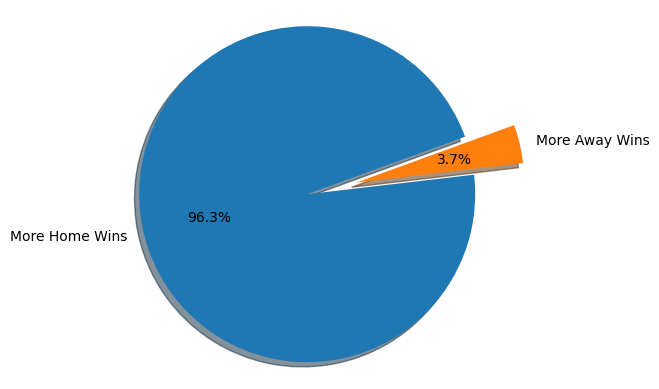

['Leeds United', 14, 15]


In [12]:
home_vs_away = [0,0]
more_away = []
team_list = list(set([t for t in match_df.team]))
team_list.sort()
print(len(team_list))
for team in team_list:
    temp_df = match_df[match_df.team == team]
    Home= Away= 0
    for currIndx, currRow in temp_df.iterrows():
        if currRow["result"] == "W" and currRow["venue"] == "Home":
            Home = Home+1
        elif currRow["result"] == "W" and currRow["venue"] == "Away":
            Away = Away+1
    if Home>Away:
        home_vs_away[0] = home_vs_away[0] + 1
    else:
        home_vs_away[1] = home_vs_away[1] + 1
        more_away.append(team)
        more_away.append(Home)
        more_away.append(Away)
print(home_vs_away)

team_labels = 'More Home Wins', 'More Away Wins'
figure1, piechart1 = plt.subplots()
piechart1.pie(home_vs_away, explode=(0, 0.3), labels=team_labels, autopct='%1.1f%%',
        shadow=True, startangle=20)
piechart1.axis('equal')
#piechart1.set_title('Percentage of wins for all the teams: Home vs Away')

plt.show()
print(more_away)


[729, 542]


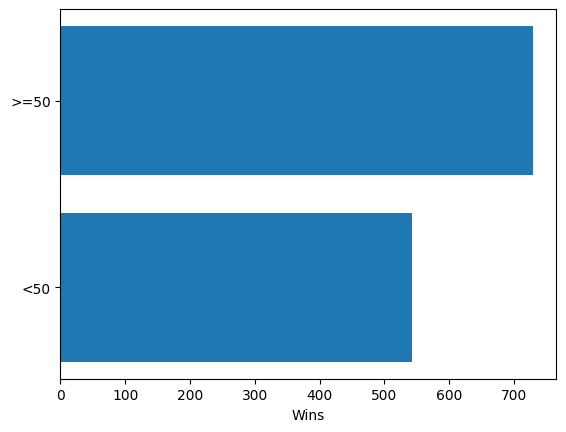

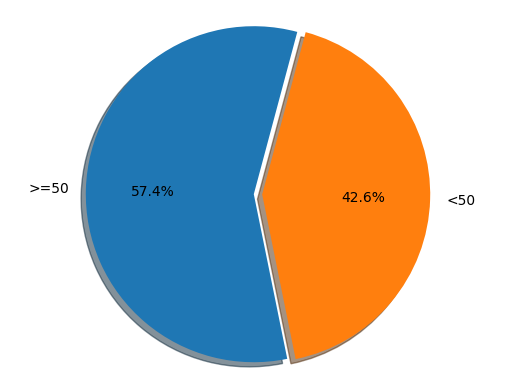

In [14]:
poss_wins_loss = [0,0]
for currIndx, currRow in match_df.iterrows():
    if currRow["result"] == "W" and currRow["poss"] >= 50:
        poss_wins_loss[0] = poss_wins_loss[0]+1
    elif currRow["result"] == "W" and currRow["poss"] < 50:
        poss_wins_loss[1] = poss_wins_loss[1]+1
print(poss_wins_loss)
plt.rcdefaults()
figure, hbar = plt.subplots()
params = ('>=50', '<50')
y_position = np.arange(len(params))
hbar.barh(y_position, poss_wins_loss, align='center')
hbar.set_yticks(y_position, labels=params)
hbar.invert_yaxis()  # labels read top-to-bottom
hbar.set_xlabel('Wins')
#hbar.set_title('Ball possession vs Wins')
plt.show()

figure1, piechart2 = plt.subplots()
piechart2.pie(poss_wins_loss, explode=(0, 0.05), labels=params, autopct='%1.1f%%',
        shadow=True, startangle=75)
piechart2.axis('equal')
#piechart2.set_title('Percentage of wins')
plt.show()



(array([264., 486., 320., 124.,   0.,  56.,  13.,   4.,   1.,   3.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

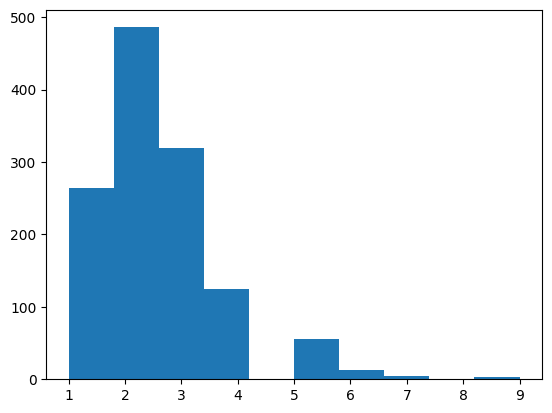

In [82]:
plt.hist(match_df.gf[match_df.result == "W"])